In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import pandas as pd

### Learn Seaborn

* **Seaborn** is a python visualization library
* Seaborn is used to plot graphs, charts, find trends 
* Seaborn is based on matplotlib

In [5]:
# to apply default seaborn theme, scaling, color palette.
sns.set()

In [64]:
sachin = pd.read_excel('./data/sachin.xlsx')

In [65]:
sachin.head(3)

,Score,Against,Format,Ground,Date
0,119*,England,Test,Manchester,1990-09-08 00:00:00
1,148*,Australia,Test,Sydney,1992-02-01 00:00:00
2,114,Australia,Test,Perth,1992-01-02 00:00:00


In [66]:
# Convert Date column to datetime type
sachin.Date  = pd.to_datetime(sachin.Date)

In [67]:
# convert format to categorical type
sachin['Format']  = sachin['Format'].astype('category')

In [68]:
# Create new column NotOut, should be True when Score has asterisk else False
sachin['NotOut'] = sachin['Score'].str.endswith('*').notna().astype('bool')

In [69]:
# find row index when he was notout
notout_index = sachin.loc[sachin.NotOut==True].index

In [70]:
# replace * with blankspace i.e. remove asterisk
sachin.iloc[notout_index, 0] = sachin.iloc[notout_index, 0].str.replace('*','', regex=False)

In [71]:
# Convert Score as int data type
sachin['Score'] = sachin['Score'].astype('int')

In [89]:
sachin['Year'] = sachin['Date'].dt.year

In [90]:
sachin.dtypes

Score               int32
Against            object
Format           category
Ground             object
Date       datetime64[ns]
NotOut               bool
Year                int64
dtype: object

In [91]:
sachin.head()

,Score,Against,Format,Ground,Date,NotOut,Year
0,119,England,Test,Manchester,1990-09-08,True,1990
1,148,Australia,Test,Sydney,1992-02-01,True,1992
2,114,Australia,Test,Perth,1992-01-02,False,1992
3,111,South Africa,Test,Johannesburg,1992-11-26,False,1992
4,165,England,Test,Chennai,1993-11-02,False,1993


In [92]:
sachin.isna().sum()

Score      0
Against    0
Format     0
Ground     0
Date       0
NotOut     0
Year       0
dtype: int64

### Figure-level and axes-level functions in seaborn 

**Figure level :**
* These are optimized for exploratory analysis
* Each different figure-level plot kind calls a particular “axes-level” function.
* Eg. relplot(), catplot()

**Axes Level functions:**
* barplot(), scatterplot()
* They draw onto a single matplotlib axes

**Scatter Plot**

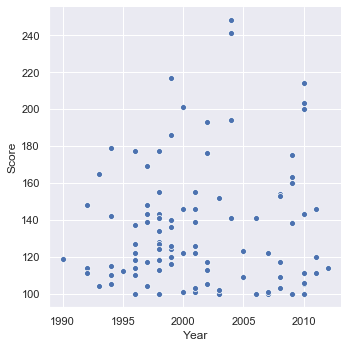

In [100]:
sns.relplot(x='Year', y='Score', data=sachin)
plt.show()

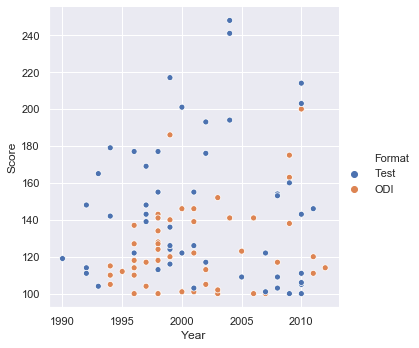

In [102]:
sns.relplot(x='Year', y='Score', hue='Format', data=sachin)
plt.show()

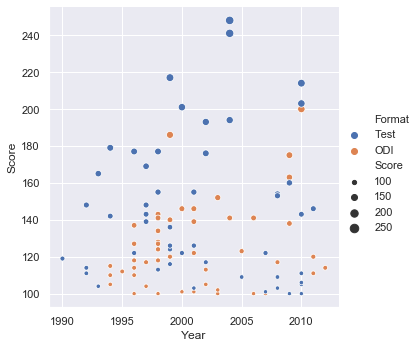

In [104]:
sns.relplot(x='Year', y='Score', hue='Format',  size='Score', data=sachin)
plt.show()

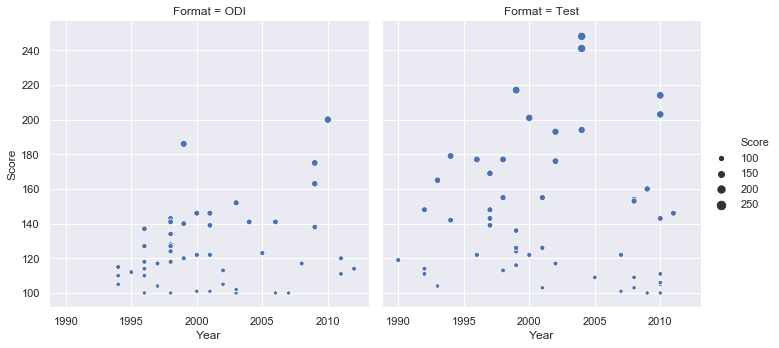

In [108]:
sns.relplot(x='Year', y='Score', col='Format',  size='Score', data=sachin)
plt.show()

**LinePlot**

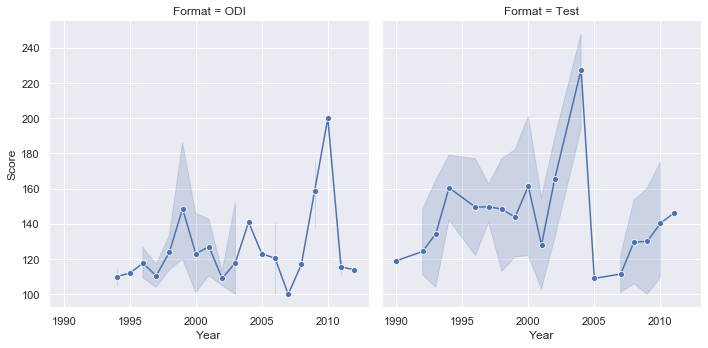

In [112]:
sns.relplot(x='Year', y='Score', col='Format',   kind='line', marker='o', data=sachin)
plt.show()

**Linear regression plot**

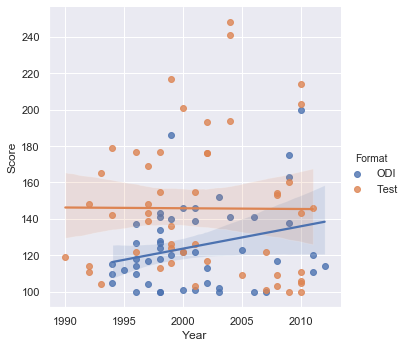

In [113]:
sns.lmplot(x='Year', y='Score', hue='Format', data=sachin)
plt.show()

**Categorical plot**

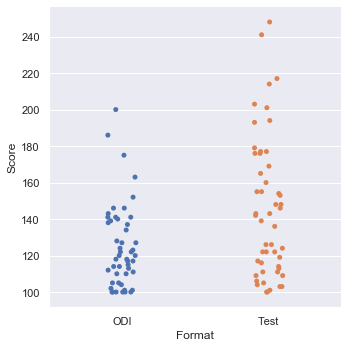

In [115]:
sns.catplot(x='Format', y='Score', data=sachin)
plt.show()

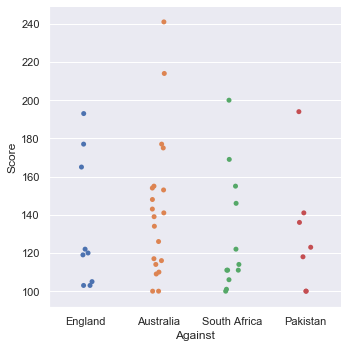

In [126]:
df = sachin[sachin['Against'].isin(['Australia', 'England', 'South Africa','Pakistan'])]

sns.catplot(x='Against', y='Score', data = df)
plt.show()

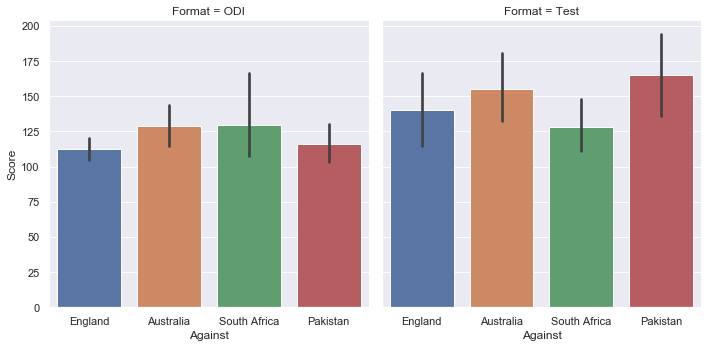

In [131]:
sns.catplot(x='Against', y='Score', kind='bar', col='Format', data=df)
plt.show()

In [134]:
df.groupby(['Against','Format'])['Score'].agg([np.mean, np.std]).reset_index()

,Against,Format,mean,std
0,Australia,ODI,128.777778,24.411973
1,Australia,Test,155.181818,41.920921
2,England,ODI,112.500000,10.606602
3,England,Test,140.285714,37.205350
4,Pakistan,ODI,116.400000,17.242390
5,Pakistan,Test,165.000000,41.012193
6,South Africa,ODI,129.600000,40.066195
7,South Africa,Test,128.285714,27.626764


**Boxplot**

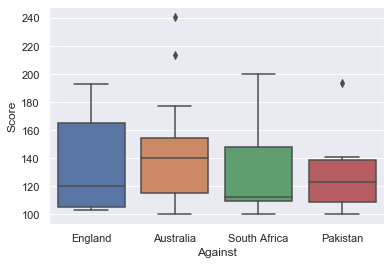

In [138]:
fig, ax = plt.subplots()

sns.boxplot(x='Against', y='Score', data=df)
plt.show()

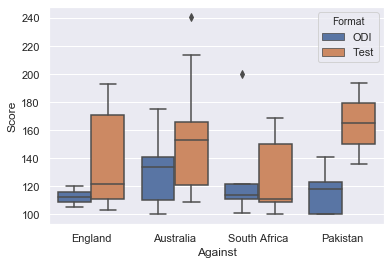

In [139]:
fig, ax = plt.subplots()

sns.boxplot(x='Against', y='Score', hue='Format', data=df)
plt.show()

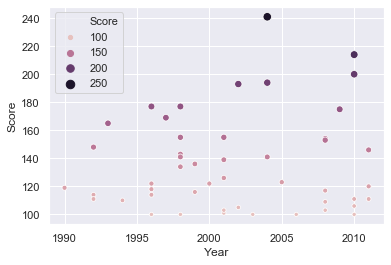

In [142]:
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)

ax = sns.scatterplot('Year', y='Score', hue='Score', size='Score', palette=cmap, data=df)

**histogram**

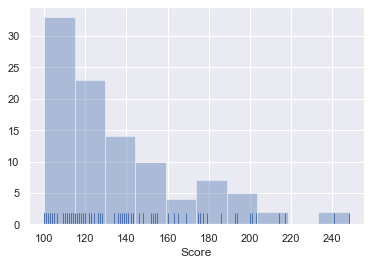

In [143]:
ax = sns.distplot(sachin['Score'], kde=False, rug=True)

**Multiplot Grid**

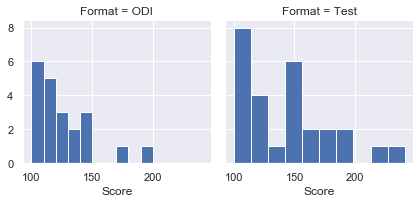

In [144]:
g = sns.FacetGrid(data=df, col='Format')
g.map(plt.hist, 'Score')
plt.show()